# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

596

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#delcaring the units of the temperature to imperial and bringin in url
temp_units = "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"

#defining the query that will be used in the loop below
query_url = url + "appid=" + weather_api_key + "&units=" + temp_units + "&q="

In [4]:
#setting up the lists that will be used for the dataframe
new_cities = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

#setting the counts
set_count = 1
record_count = 0

#creating the for loop
print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    
    if record_count <50:
        
        record_count += 1
    
    else:
        
        set_count = set_count +1
        record_count = 0
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    try: 
        
        response = requests.get(query_url + city).json()
        new_cities.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
    
    except:
        print(f"City not found. Skipping...")
    
        pass
              
print(f"-----------------------------")
print(f"Data Retrieval Complete")     
print(f"-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | mehamn
Processing Record 3 of Set 1 | college
Processing Record 4 of Set 1 | provideniya
Processing Record 5 of Set 1 | touros
Processing Record 6 of Set 1 | xichang
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | impfondo
Processing Record 9 of Set 1 | bredasdorp
Processing Record 10 of Set 1 | villarrica
Processing Record 11 of Set 1 | akyab
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | carnarvon
Processing Record 14 of Set 1 | naples
Processing Record 15 of Set 1 | rabo de peixe
Processing Record 16 of Set 1 | gorno-chuyskiy
City not found. Skipping...
Processing Record 17 of Set 1 | ushuaia
Processing Record 18 of Set 1 | algete
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | biak
Processing Record 22 of Set 1 | waterloo
Processing Rec

Processing Record 32 of Set 4 | palabuhanratu
City not found. Skipping...
Processing Record 33 of Set 4 | dauriya
Processing Record 34 of Set 4 | limbang
Processing Record 35 of Set 4 | palmer
Processing Record 36 of Set 4 | kahului
Processing Record 37 of Set 4 | namatanai
Processing Record 38 of Set 4 | novaya ladoga
Processing Record 39 of Set 4 | camopi
Processing Record 40 of Set 4 | geraldton
Processing Record 41 of Set 4 | dhidhdhoo
Processing Record 42 of Set 4 | mana
Processing Record 43 of Set 4 | kodiak
Processing Record 44 of Set 4 | timberlake
Processing Record 45 of Set 4 | gornopravdinsk
Processing Record 46 of Set 4 | whitehorse
Processing Record 47 of Set 4 | riyadh
Processing Record 48 of Set 4 | cockburn town
Processing Record 49 of Set 4 | talnakh
Processing Record 50 of Set 4 | guozhen
Processing Record 0 of Set 5 | chicama
Processing Record 1 of Set 5 | wasilla
Processing Record 2 of Set 5 | la baneza
Processing Record 3 of Set 5 | ati
Processing Record 4 of Set 5

Processing Record 21 of Set 8 | doctor pedro p. pena
City not found. Skipping...
Processing Record 22 of Set 8 | namibe
Processing Record 23 of Set 8 | mogadishu
Processing Record 24 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 25 of Set 8 | gat
Processing Record 26 of Set 8 | ileza
Processing Record 27 of Set 8 | borovoy
Processing Record 28 of Set 8 | roald
Processing Record 29 of Set 8 | khandyga
Processing Record 30 of Set 8 | codrington
Processing Record 31 of Set 8 | okha
Processing Record 32 of Set 8 | marienburg
Processing Record 33 of Set 8 | padre bernardo
Processing Record 34 of Set 8 | mitsamiouli
Processing Record 35 of Set 8 | itarema
Processing Record 36 of Set 8 | wajima
Processing Record 37 of Set 8 | anori
Processing Record 38 of Set 8 | kirovskiy
Processing Record 39 of Set 8 | holme
Processing Record 40 of Set 8 | simpang
Processing Record 41 of Set 8 | luganville
Processing Record 42 of Set 8 | ouro fino
Processing Record 43 of Set 8 | 

Processing Record 4 of Set 12 | brae
Processing Record 5 of Set 12 | celestun
Processing Record 6 of Set 12 | vestmannaeyjar
Processing Record 7 of Set 12 | bayonet point
Processing Record 8 of Set 12 | kurush
Processing Record 9 of Set 12 | locri
Processing Record 10 of Set 12 | aflu
City not found. Skipping...
Processing Record 11 of Set 12 | marivan
Processing Record 12 of Set 12 | angoche
Processing Record 13 of Set 12 | pocoes
Processing Record 14 of Set 12 | tual
Processing Record 15 of Set 12 | phayao
Processing Record 16 of Set 12 | hecun
Processing Record 17 of Set 12 | amazar
Processing Record 18 of Set 12 | manali
Processing Record 19 of Set 12 | nizhniy kuranakh
Processing Record 20 of Set 12 | trofors
Processing Record 21 of Set 12 | srednekolymsk
Processing Record 22 of Set 12 | hofn
Processing Record 23 of Set 12 | vestmanna
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | kuche
City not found. Skipping...
Processing Record 26 of Set 12 | boende
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#making the new DataFrame with above information
new_city_data = pd.DataFrame({
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date
})


#new_city_data_df.count()

#showing the new dataframe
new_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.37,-73.41,46.00,81,1,5.82,US,1600653957
1,Mehamn,71.04,27.85,42.82,82,82,16.20,NO,1600654009
2,College,64.86,-147.80,50.00,61,75,1.77,US,1600654010
3,Provideniya,64.38,-173.30,44.60,65,75,8.95,RU,1600654010
4,Touros,-5.20,-35.46,77.00,83,40,11.41,BR,1600654010


In [6]:
#exporting the new dataframe into a csv file
new_city_data.to_csv("../output_data/cities_csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
humidity_100 = new_city_data.loc[new_city_data["Humidity"] >= 100]

print(humidity_100)

#there are no cities that have humidty over 100%. there are 13 cities
#have humidty at 100%

           City  Latitude  Longitude  Max Temp  Humidity  Cloudiness  \
16       Algete     40.60      -3.50     59.00       100          84   
83   Port Hardy     50.70    -127.42     53.60       100          90   
86     Klaksvík     62.23      -6.59     51.80       100         100   
88     Carballo     43.21      -8.69     62.60       100          75   
93     Barcelos     41.54      -8.62     61.00       100          40   
105  Tendūkheda     23.40      79.55     77.00       100          75   
139      Broome     42.25     -75.83     44.01       100           0   
150   Esperance    -33.87     121.90     53.60       100          75   
184   La Bañeza     42.30      -5.90     55.40       100          12   
224  Draguignan     43.53       6.47     64.40       100           0   
229        Laas     46.62      10.70     57.20       100          75   
355     Malbork     54.04      19.03     55.00       100           0   
362       Holme     56.11      10.17     53.60       100        

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

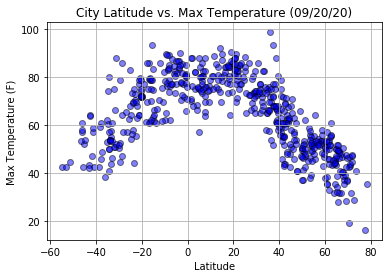

In [11]:
from datetime import date

city_lat = new_city_data["Latitude"]
current_date = date.today()
today_date = current_date.strftime("%m/%d/%y")
temps = new_city_data["Max Temp"]

plt.scatter(city_lat, temps, alpha=.5, marker="o", color="blue", edgecolor="black")
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Max Temperature ({today_date})')
plt.grid(True)
plt.savefig('../Images/lat.temp.png')
plt.show()

This plot shows that the temperature is a lot warmer as the cities approach the latitude 0, which is the equator. There is a positive correlation between latitude approaching 0 and temperature increasing.

## Latitude vs. Humidity Plot

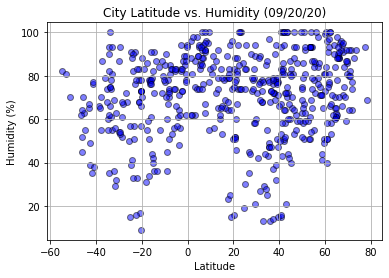

In [12]:
city_humidity = new_city_data["Humidity"]

plt.scatter(city_lat, city_humidity, alpha=.5, marker="o", color="blue", edgecolor="black")
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Humidity ({today_date})')
plt.grid(True)
plt.savefig('../Images/lat.humidity.png')
plt.show()

This scatter plot is very ambigious and shows little to no correlation between latitude and humidit levels. Most locations have a humidity above 40%.

## Latitude vs. Cloudiness Plot

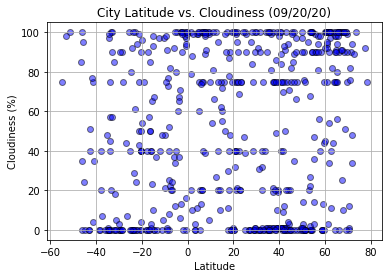

In [13]:
city_cloudiness = new_city_data["Cloudiness"]

plt.scatter(city_lat, city_cloudiness, alpha=.5, marker="o", color="blue", edgecolor="black")
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Cloudiness ({today_date})')
plt.grid(True)
plt.savefig('../Images/lat.cloudiness.png')
plt.show()

More than humidity, the latitude vs. cloudiness plot is ambigious and shows absolutely no correlation.

## Latitude vs. Wind Speed Plot

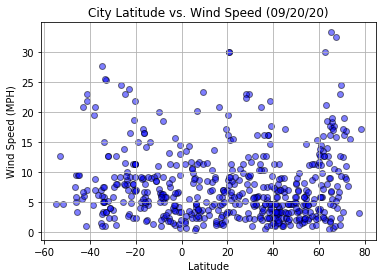

In [14]:
city_windspeed = new_city_data["Wind Speed"]

plt.scatter(city_lat, city_windspeed, alpha=.5, marker="o", color="blue", edgecolor="black")
plt.ylabel('Wind Speed (MPH)')
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Wind Speed ({today_date})')
plt.grid(True)
plt.savefig('../Images/lat.windspeed.png')
plt.show()

This scatter plot shows that the wind speeds are mostly between 0-10 mph for most locations. There are a few outlier locations that have wind speeds above 20 mph.

## Linear Regression

In [15]:
# OPTIONAL: Create a function to create Linear Regression plots
def linear_reg_plot(x_values, y_values, title):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq, xy=(0.05, 0.13), xycoords='axes fraction', fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.title(title)
    print(f"The r-squared is: {rvalue}")
    plt.savefig(f"../Images/{title}.png")
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames
north_hemp = new_city_data.loc[new_city_data["Latitude"] > 0]
south_hemp = new_city_data.loc[new_city_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8417749751875716


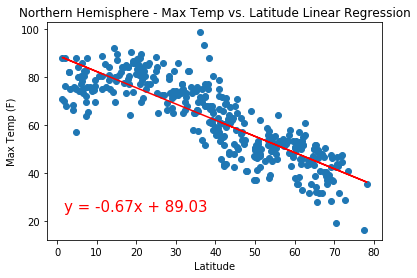

None


In [17]:
x_values = north_hemp["Latitude"]
y_values = north_hemp["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7443413535384416


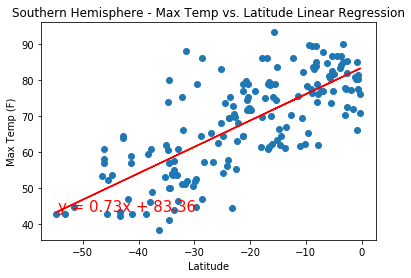

None


In [18]:
x_values = south_hemp["Latitude"]
y_values = south_hemp["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"))

Both linear regression plots demonstrate as location latitude's reach closer to 0 latitude, the temperature equally increases. This is a positive correlation between max temp and latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.025172945484692184


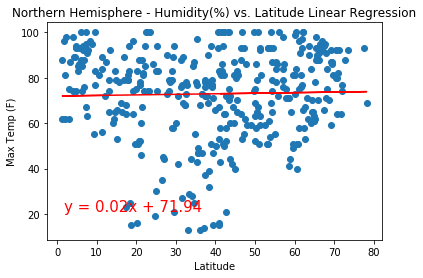

None


In [19]:
x_values = north_hemp["Latitude"]
y_values = north_hemp["Humidity"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Northern Hemisphere - Humidity(%) vs. Latitude Linear Regression"))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20085765592643248


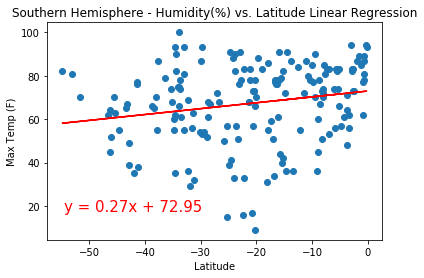

None


In [20]:
x_values = south_hemp["Latitude"]
y_values = south_hemp["Humidity"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Southern Hemisphere - Humidity(%) vs. Latitude Linear Regression"))

The northern hemisphere regression plot for humidity shows no correlation between humidity and latitude. This can also be seen because the slope is very small (0.02). For the southern hemisphere, there seems to be a little correlation as the slop slightly increases (0.27). Overall, there is minimal correlation between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07952330873391561


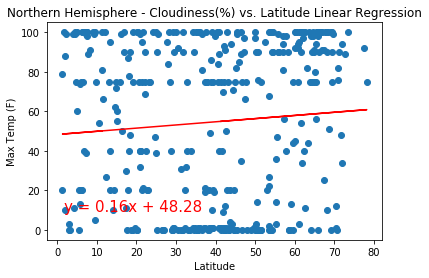

None


In [21]:
x_values = north_hemp["Latitude"]
y_values = north_hemp["Cloudiness"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Northern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression"))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16793704436385604


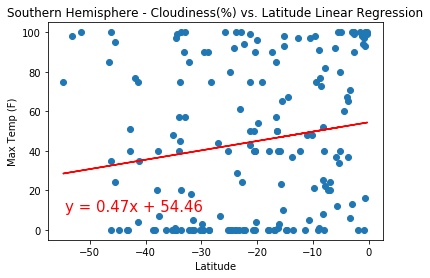

None


In [22]:
x_values = south_hemp["Latitude"]
y_values = south_hemp["Cloudiness"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Southern Hemisphere - Cloudiness(%) vs. Latitude Linear Regression"))

In both plots, there is a small correlation of the cloudiness increasing as locations get closer to 0 latitude.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.125904900061436


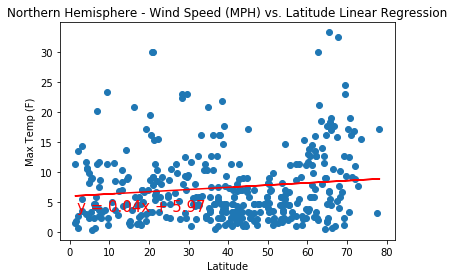

None


In [23]:
x_values = north_hemp["Latitude"]
y_values = north_hemp["Wind Speed"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Northern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression"))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.16502191001407954


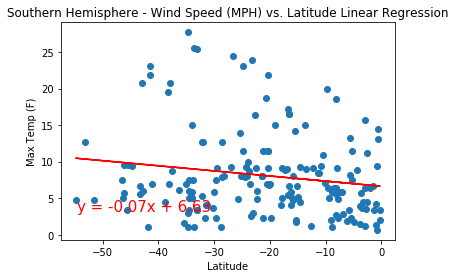

None


In [24]:
x_values = south_hemp["Latitude"]
y_values = south_hemp["Wind Speed"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values,
                     "Southern Hemisphere - Wind Speed (MPH) vs. Latitude Linear Regression"))

In the first plot, there seems to be correlation between latitude and wind speeds. However, there is a small correlation in the southern hemisphere plot as the slope is going downwards - As the latitude reaches 0, the max temp also drops. 